<a href="https://colab.research.google.com/github/hwanython/kaggle-chestXray-penumonia/blob/main/05_predict_test_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow.keras
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tqdm import tqdm
import numpy as np

In [ ]:
data_dir = '/content/drive/MyDrive/AI/01.Kaggle/Chest_X_ray_image/data/chest_xray'
test_dir = os.path.join(data_dir, 'test')

In [ ]:
best_model = '/content/drive/MyDrive/AI/01.Kaggle/Chest_X_ray_image/data/chest_xray/ckpt_model/ep20-loss0.1537-acc0.9406-val_loss0.1374-val_acc0.9545.h5'

In [ ]:
batch_size = 16
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
model =load_model(best_model)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir, shuffle=False,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size = batch_size, class_mode='binary')
test_generator

Found 624 images belonging to 2 classes.


# 모델 평가

In [ ]:
score = model.evaluate(test_generator)
print("test score:{:.2f} ".format( score[1]* 100))

39/39 [==============================] - 182s 5s/step - loss: 0.2892 - acc: 0.8910
test score:89.10 


In [ ]:
index = -1
file_path_array = []
pred_array = []
correct_array = []
for i  in tqdm(range(len(test_generator))):
    batch_img, batch_label = test_generator[i]
    predict = model.predict(batch_img)
    for one_pred, one_label in zip(predict, batch_label):
        index += 1
        if one_pred > 0.5:
            pred = 1
        else:
            pred = 0
        file_path_array.append(test_generator.filepaths[index])
        pred_array.append(pred)
        correct_array.append(int(one_label))

100%|██████████| 39/39 [02:08<00:00,  3.30s/it]


# plot normal image prediction

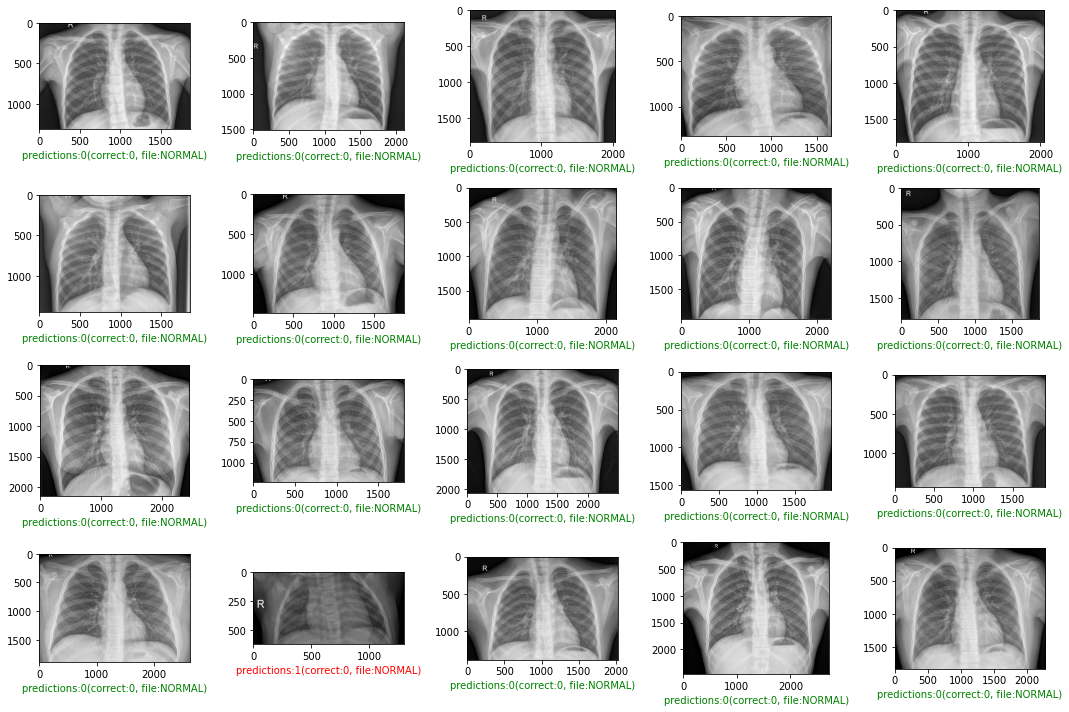

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 10))

col = 5; row = 4
for i in range(1, col * row + 1):
    fig.add_subplot(row, col, i)
    img = plt.imread(file_path_array[i-1])
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    pred = pred_array[i-1]
    correct = correct_array[i-1]
    if pred == correct:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("predictions:{}(correct:{}, file:{})".format(pred, correct,file_path_array[i-1].split('/')[-2]), color=color)
plt.tight_layout()
plt.show()

#plot pneumonia image predictions

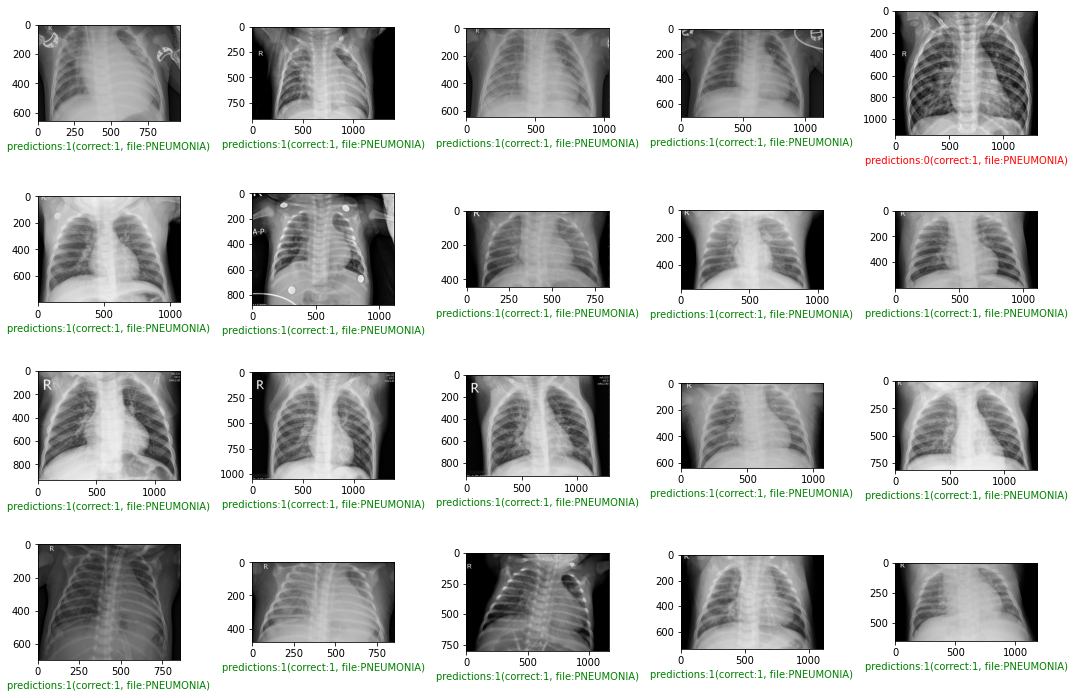

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 10))

col = 5; row = 4
for i in range(1, col * row + 1):
    fig.add_subplot(row, col, i)
    img = plt.imread(file_path_array[i-1 + 400])
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    pred = pred_array[i-1 + 400]
    correct = correct_array[i-1 + 400]
    if pred == correct:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("predictions:{}(correct:{}, file:{})".format(pred, correct,file_path_array[i-1 + 400].split('/')[-2]), color=color)
plt.tight_layout()
plt.show()

#Confusion Matrix

<Figure size 432x288 with 0 Axes>

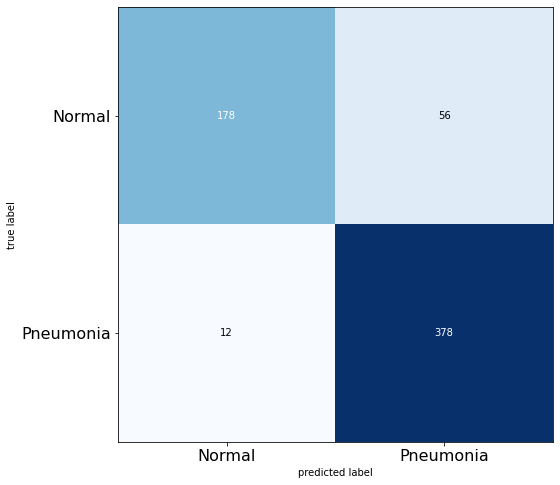

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(correct_array, pred_array)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, cmap=plt.get_cmap('Blues'))
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

# Evaluate Index in Classcification

In [ ]:
TP, FN, FP, TN = 178, 56, 12, 378

In [ ]:
# 정밀도 
precision = TP/(TP+FP)
print("정밀도:",precision * 100 )

정밀도: 93.6842105263158


In [ ]:
#재현율
recall = TP/(TP+FN)
print("재현율:",recall * 100 )

재현율: 76.06837606837607


In [ ]:
#정확도
accuracy = (TP+TN)/(TP+FN+FP+TN)
print("정확도:",accuracy * 100 )

정확도: 89.1025641025641


In [ ]:
#F1 점수
F1 = 2*(precision*recall)/(precision+recall)
print("F1 점수:", F1)

F1 점수: 0.8396226415094339
